# Optimizer

In [47]:
aimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

SyntaxError: invalid syntax (<ipython-input-47-26ba9a7a8762>, line 1)

In [ ]:
def f(X):
    Y = (X - 1.5)**2 + 0.5
    print ("X = {}, Y = {}".format(X, Y))
    return Y

In [ ]:
# Example
min_result = spo.minimize(f, 2, method='SLSQP', options={'disp': True})
print ("Minima Found at: ")
print ("X = {}, Y = {}".format(min_result.x, min_result.fun))

# Plot function values, mark minima
Xplot = np.linspace(0.5, 2.5, 21)
Yplot = f(Xplot)
plt.plot(Xplot, Yplot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title("Minima of an objective function")
plt.show()

In [72]:
def error(line, data):
    """Compute error between given line model and observed data
    
    Parameters
    ----------
    line: tuple/list/array (C0, C1) where C0 is slope and Ci in Y-intersept
    data: 2D array where each row is a point (x, y)
    
    Returns error as a single real value
    """
    
    # Metric: Sum of squared Y-axis differences
    err = np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1])) ** 2)
    return err

In [73]:
def fit_line(data, error_func):
    
    # Initial guess
    line = np.float32([0, np.mean(data[:1])])
    
    # Call optimizer to minimize the error_func
    result = spo.minimize(error_func, line, args=(data,), method='SLSQP', options={'disp': True})
    return result.x
    

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 417.8348323805599
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Fitted line: C0 = 3.640024586061595, C1 = 4.49717479707736


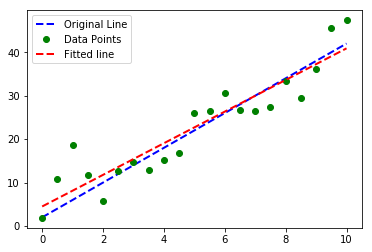

In [104]:
# Example

# Define original line
l = np.float32([4, 2])
print ("Original line: C0 = {}, C1 = {}".format(l[0], l[1]))
Xorig = np.linspace(0, 10, 21)
Yorig = l[0] * Xorig + l[1]
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original Line")

# Generate noisy data points
noise_sigma = 5.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
plt.plot(data[:, 0], data[:, 1], 'go', label='Data Points')

# Try to fit a line to this data
l_fit = fit_line(data, error)
print ("Fitted line: C0 = {}, C1 = {}".format(l_fit[0], l_fit[1]))
plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label='Fitted line')
plt.legend(loc='upper left')
plt.show()